In [17]:
import numpy as np
import sys
sys.path.append("/cluster/users/tom/git/neon_blink_detection/")

from training.video_loader import video_loader
from src.helper import OfParams, AugParams
from pathlib import Path

video_path = Path("/cluster/users/tom/experiments/neon_blink_detection/datasets/train_data")
of_path = Path("/cluster/users/tom/experiments/neon_blink_detection/datasets/train_data/optical_flow")

of_params = OfParams()
aug_params = AugParams()

clip_names = np.array(
    [
        "1000-2022-12-14-09-43-56-0fcac6d3",
        "1004-2022-12-14-13-14-14-c8a509b9",
        "1002-2022-12-14-11-43-58-23e05b8c",
        "1260-2023-01-26-16-16-34-0165fc4e",
        "1337-2023-02-06-15-36-31-211278ea",
        "1325-2023-02-03-17-46-35-11ad4b90",
        "1327-2023-02-06-09-40-56-d5cf1243",
        "1326-2023-02-03-17-45-57-8a41f628",
        "1317-2023-02-03-09-41-14-30f69b87",
        "1316-2023-02-03-09-34-09-31ef7938",
        "1000-2022-12-14-09-43-56-0fcac6d3",
        "1005-2022-12-14-15-07-31-ba8d94d5",
        "2023-02-13_10-52-56-0a234ae3",
        "1325-2023-02-03-17-46-35-11ad4b90",
        "1253-2023-01-26-11-39-39-c0de66cb",
        "1265-2023-01-27-10-37-53-f3b4f617",
        "1328-2023-02-06-09-45-58-f56cc84e",

    ]
)

iclip = 1

In [18]:
rec = video_loader(of_params, aug_params)

ts, images_left, images_right = rec._get_frames(clip_names[iclip], convert_to_gray=True)


deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly


KeyboardInterrupt: 

In [188]:
of_params = OfParams(n_layers=3, layer_interval=7, average=False, img_shape=(64, 64), grid_size=4, step_size=5, window_size=11, stop_steps=3)

optical_flow, _ = rec._compute_optical_flow(of_params, images_left, images_right)

of_left_man = optical_flow[:, 0:400, 1]

In [14]:
of_params = OfParams(n_layers=3, layer_interval=7, average=False, img_shape=(64, 64), grid_size=4, step_size=5, window_size=11, stop_steps=3)

feature_array, all_timestamps, clip_transitions = rec._load_features(
            clip_names[iclip], of_params
        )

of_left = feature_array[:, 0:400, 1]
of_right = feature_array[:, 400:, 1]

labels = rec._load_gt_labels(clip_names[iclip])
onsets = np.vstack((np.array(labels[labels["label"]=="onset"]["start_ts"]), np.array(labels[labels["label"]=="onset"]["end_ts"]))).T
offsets = np.vstack((np.array(labels[labels["label"]=="offset"]["start_ts"]), np.array(labels[labels["label"]=="offset"]["end_ts"]))).T



deprecated pixel format used, make sure you did set range correctly
 (repeated 317873 more times)


(1.6710210062842744e+18, 1.6710210072852754e+18)

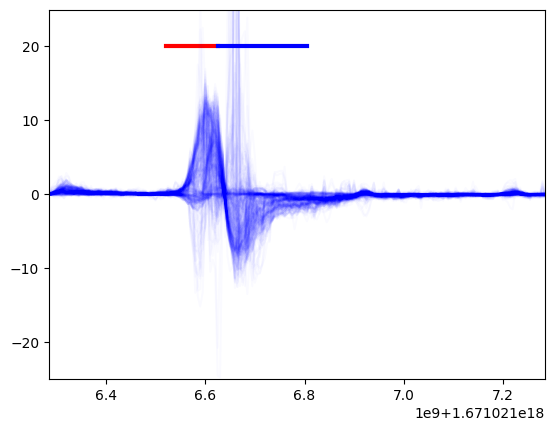

In [16]:

import matplotlib.pyplot as plt

for onset in onsets:
    if onset[0]>ts[0]:
        plt.plot(onset, [20,20], "r", lw=3)
for offset in offsets:
    if offset[0]>ts[0]:
        plt.plot(offset, [20,20], "b", lw=3)

for i in range(400):
    plt.plot(ts, of_left[:,i], 'b', alpha=0.02)

plt.ylim(-25,25)
plt.xlim(ts[0], ts[200])

In [ ]:
f, ax = plt.subplots(10, 10)
f.set_size_inches(20,20)
dur = int(np.where(ts==onsets[0][1])[0] - np.where(ts==onsets[0][0])[0])
counter = 0
for i in range(10):
    for j in range(10):

        if counter == dur:
            break

        ax[i, j].imshow(images_left[np.where(ts==onsets[0][0])[0]+counter][0, :, :, 0], cmap="gray") 

        counter += 1


<font size = 5>**Generate frames for simulated motion video**

In [ ]:
import numpy as np
# import av

movement_onsets = [300, 700, 1000, 1200, 1500, 2200, 2400, 2800, 3000, 4000, 4200, 4500, 4800, 5000]

displacement = (np.round(np.sin(np.linspace(0, np.pi, 100))*100)).astype(int)

timestamps = []
all_frames = []

i_frame = 0
counter = 0
mov_frames = []

while i_frame <= n_frames:

    sq_idc = np.hstack([np.array(range(35,158)), np.array(range(227,350))])

    if np.any(i_frame == np.array(movement_onsets)):
        counter = 0
        while counter<100:
            mov_frames.append(i_frame)
            one_frame = 255*np.ones([192, 384, 1])
            # Displacing
            one_frame[20+displacement[counter]:70+displacement[counter], sq_idc, 0] = 0
            counter += 1
            i_frame += 1
            all_frames.append(one_frame)
            timestamps.append(i_frame/1e9)

    else:
        one_frame = 255*np.ones([192, 384, 1])
        one_frame[20:70, sq_idc, 0] = 0
        i_frame += 1
        all_frames.append(one_frame)
        timestamps.append(i_frame/1e9)



all_frames = np.array(all_frames).astype(np.uint8)
timestamps = np.array(timestamps).astype(np.int64)

from moviepy.editor import ImageSequenceClip
print(all_frames.shape)
f = [np.tile(all_frames[x, :, :, :], (1, 1, 3)) for x in range(n_frames)]
vid = ImageSequenceClip(f, fps=200)
vid.write_videofile("/cluster/users/tom/Neon Sensor Module v1 ps1.mp4")
timestamps.tofile("/cluster/users/tom/Neon Sensor Module v1 ps1.time")


# fps = 200
# total_frames = all_frames.shape[0]

# container = av.open("/cluster/users/test.mp4", mode="w")

# stream = container.add_stream("mpeg4", rate=fps)
# stream.width = all_frames.shape[1]
# stream.height = all_frames.shape[2]
# stream.pix_fmt = "yuv420p"

# for frame_i in range(total_frames):

#     img = np.tile(all_frames[frame_i, :, :, :], (1, 1, 3))

#     frame = av.VideoFrame.from_ndarray(img, format="rgb24")
#     for packet in stream.encode(frame):
#         container.mux(packet)

# # Flush stream
# for packet in stream.encode():
#     container.mux(packet)

# # Close the file
# container.close()

<font size = 5>**Functions for loading videos with either PIMS or PyAV**

In [21]:
import pims
import av

def load_video(rec, clip_name, method="pims"):
        
    timestamps = rec._get_timestamps(clip_name)
    clip_onsets, clip_offsets = rec._get_clip_trigger(clip_name, timestamps)

    clip_path = "/cluster/users/tom/experiments/neon_blink_detection/datasets/train_data/%s/Neon Sensor Module v1 ps1.mp4" % clip_name

    if method=="pims":
        
        vid = pims.Video(clip_path)

        all_frames = []
        ts_idc = []

        for iclips in range(len(clip_onsets)):
            print("Clip %i of %i" % (iclips+1, len(clip_onsets)), end="\r")
            for i_frame in range(clip_onsets[iclips], clip_offsets[iclips]+1):
                all_frames.append(np.array(vid[i_frame]))
                ts_idc.append(i_frame)

        # for i_frame in range(len(vid)):
        #     if i_frame > max(clip_offsets):
        #         break

        #     sign_onset = np.sign(i_frame - clip_onsets)
        #     sign_offset = np.sign(i_frame - clip_offsets)

        #     if any((sign_onset != sign_offset)):
        #         print(i_frame, end="\r")
        #         all_frames.append(np.array(vid[i_frame]))
        #         ts_idc.append(i_frame)

        all_frames = np.array(all_frames)
        timestamps = timestamps[ts_idc]

        eye_left_images = all_frames[:, :, 0:192, 0]
        eye_right_images = all_frames[:, :, 192:, 0]

    elif method=="pyav":

        gen =  _make_video_generator_mp4(clip_path, convert_to_gray=True)

        all_frames = []
        ts_idc = []
        for i_frame, x in enumerate(gen):

            if i_frame > max(clip_offsets):
                break

            sign_onset = np.sign(i_frame - clip_onsets)
            sign_offset = np.sign(i_frame - clip_offsets)

            if any((sign_onset != sign_offset)):
                print(i_frame, end="\r")
                all_frames.append(x)
                ts_idc.append(i_frame)

        all_frames = np.array(all_frames)
        timestamps = timestamps[ts_idc]

        eye_left_images = all_frames[:, :, 0:192, 0]
        eye_right_images = all_frames[:, :, 192:, 0]

    return timestamps, eye_left_images, eye_right_images

def _make_video_generator_mp4(clip_name, convert_to_gray: bool):

    container = av.open(
        str(clip_name)
    )

    for frame in container.decode(video=0):
        if convert_to_gray:
            y_plane = frame.planes[0]
            gray_data = np.frombuffer(y_plane, np.uint8)
            img_np = gray_data.reshape(y_plane.height, y_plane.line_size, 1)
            img_np = img_np[:, : frame.width]
        else:
            img_np = frame.to_rgb().to_ndarray()
        yield img_np

<font size = 5>**Load videos using either PIMS or PyAV** <br>
<font size = 4> (Simulated data)

In [ ]:
clip_path = "/cluster/users/tom/experiments/neon_blink_detection/datasets/train_data/simulated_data/Neon Sensor Module v1 ps1.mp4"

left_images_pims, right_images_pims = load_video(clip_path, method="pims")
left_images_pyav, right_images_pyav = load_video(clip_path, method="pyav")

ts = np.fromfile("/cluster/users/tom/experiments/neon_blink_detection/datasets/train_data/simulated_data/Neon Sensor Module v1 ps1.time", dtype=np.int64)

ts = timestamps[:-1]

labels = rec._load_gt_labels("simulated_data")
onsets = np.vstack((np.array(labels[labels["label"]=="onset"]["start_ts"]), np.array(labels[labels["label"]=="onset"]["end_ts"]))).T
offsets = np.vstack((np.array(labels[labels["label"]=="offset"]["start_ts"]), np.array(labels[labels["label"]=="offset"]["end_ts"]))).T

<font sizse = 4>Compute optical flow for simulated data

In [90]:
of_params = OfParams(n_layers=5, layer_interval=1, average=False, img_shape=(64, 64), grid_size=4, step_size=3, window_size=10, stop_steps=3)

optical_flow, _ = rec._compute_optical_flow(of_params, left_images_pyav, right_images_pyav)

of_mean_pyav = optical_flow[:, :, 1].mean(axis=1)

optical_flow, _ = rec._compute_optical_flow(of_params, left_images_pims, right_images_pims)

of_mean_pims = optical_flow[:, :, 1].mean(axis=1)


<font sizse = 4>Plot optical flow and labelled "blinks"

Text(0, 0.5, 'Optical flow')

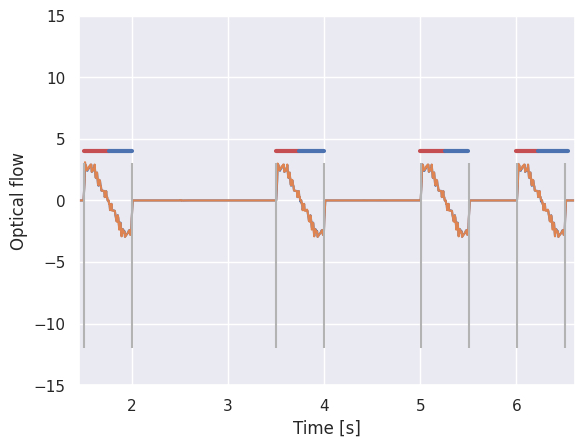

In [111]:
import seaborn as sns
sns.set()

timestamps = (ts - ts[0])/1e9

for onset in onsets:
    if onset[0]>ts[0]:
        plt.plot((onset-ts[0])/1e9, [4,4], "r", lw=3)
for offset in offsets:
    if offset[0]>ts[0]:
        plt.plot((offset-ts[0])/1e9, [4,4], "b", lw=3)

plt.plot(timestamps, of_mean_pyav)
plt.plot(timestamps, of_mean_pims)

plt.xlim(timestamps[290], timestamps[1320])
plt.vlines([timestamps[300], timestamps[700]], -12, 3, color=[.7, .7, .7])
plt.vlines([timestamps[400], timestamps[800]], -12, 3, color=[.7, .7, .7])
plt.vlines([timestamps[1000], timestamps[1100]], -12, 3, color=[.7, .7, .7])
plt.vlines([timestamps[1200], timestamps[1300]], -12, 3, color=[.7, .7, .7])

plt.ylim(-15, 15)
plt.xlabel("Time [s]")
plt.ylabel("Optical flow")

<font size = 5>**Load videos using either PIMS or PyAV** <br>
<font size = 4> (Real data)

In [22]:
clip_name = clip_names[1]

clip_path = "/cluster/users/tom/experiments/neon_blink_detection/datasets/train_data/%s/Neon Sensor Module v1 ps1.mp4" % clip_name

ts, left_images_pims, right_images_pims = load_video(rec, clip_name, method="pims")
ts, left_images_pyav, right_images_pyav = load_video(rec, clip_name, method="pyav")

labels = rec._load_gt_labels(clip_name)
onsets = np.vstack((np.array(labels[labels["label"]=="onset"]["start_ts"]), np.array(labels[labels["label"]=="onset"]["end_ts"]))).T
offsets = np.vstack((np.array(labels[labels["label"]=="offset"]["start_ts"]), np.array(labels[labels["label"]=="offset"]["end_ts"]))).T


deprecated pixel format used, make sure you did set range correctly
 (repeated 126243 more times)
deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly


deprecated pixel format used, make sure you did set range correctly
 (repeated 15336 more times)
deprecated pixel format used, make sure you did set range correctly
deprecated pixel format used, make sure you did set range correctly
 (repeated 166564 more times)
deprecated pixel format used, make sure you did set range correctly


deprecated pixel format used, make sure you did set range correctly
 (repeated 317873 more times)


(22102, 192, 192)

In [74]:
of_params = OfParams(n_layers=3, layer_interval=7, average=False, img_shape=(64, 64), grid_size=4, step_size=3, window_size=15, stop_steps=3)

optical_flow, _ = rec._compute_optical_flow(of_params, left_images_pyav, right_images_pyav)

of_mean_pyav = optical_flow[:, 0:400, 1]

optical_flow, _ = rec._compute_optical_flow(of_params, left_images_pims, right_images_pims)

of_mean_pims = optical_flow[:, 0:400, 1]


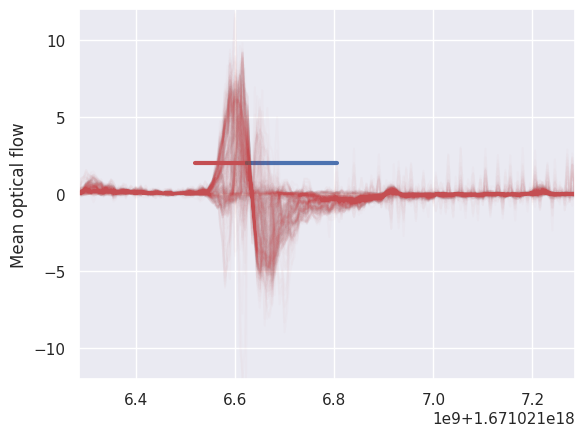

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

for onset in onsets:
    if onset[0]>ts[0]:
        plt.plot(onset, [2, 2], "r", lw=3)
for offset in offsets:
    if offset[0]>ts[0]:
        plt.plot(offset, [2, 2], "b", lw=3)

for i in range(400):
    # plt.plot(ts, of_mean_pyav[:, i], 'b', alpha=0.02)
    plt.plot(ts, of_mean_pims[:, i], 'r', alpha=0.02)

# plt.plot(ts, of_mean_pyav.mean(axis=1), 'b')
# plt.plot(ts, of_mean_pims.mean(axis=1), 'r')


plt.xlim(ts[0], ts[200])
plt.ylim(-12, 12)
# plt.xlabel("Time [s]")
plt.ylabel("Mean optical flow")
plt.show()


In [87]:
import matplotlib
matplotlib.rc_file_defaults()

In [205]:
iclip

4

In [44]:
ts[0]

1675413249732101503

In [28]:
gray_data = np.frombuffer(y_plane, np.uint8)

print(np.frombuffer(left_images_pims.shape)
left_images_pyav.shape

(22102, 192, 192, 3)


(22102, 192, 192, 1)

In [30]:
np.frombuffer(left_images_pims[0, :, :, :], np.uint8)

ValueError: ndarray is not C-contiguous

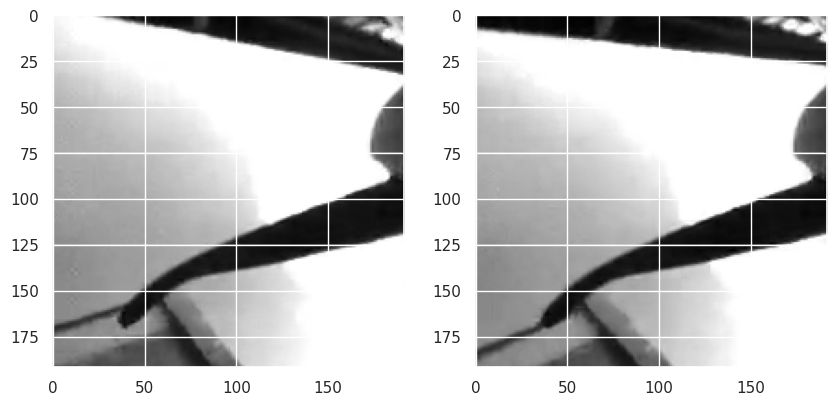

In [58]:
import matplotlib.pyplot as plt
# iframe = 8983
iframe = 9200

f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(left_images_pims[iframe, :, :], cmap = 'gray')
ax[0].hlines(125, 0, 190, color='w', alpha=0.25)
ax[0].hlines(75, 0, 190, color='w', alpha=0.25)
ax[1].imshow(left_images_pyav[iframe, :, :], cmap = 'gray')
ax[1].hlines(75, 0, 190, color='w', alpha=0.25)
ax[1].hlines(125, 0, 190, color='w', alpha=0.25)

plt.show()

In [32]:
r = [np.corrcoef(left_images_pims[x, :, :].flatten(), left_images_pyav[x, :, :].flatten())[0, 1] for x in range(ts.shape[0])]


Text(0, 0.5, 'Correlation coeff.')

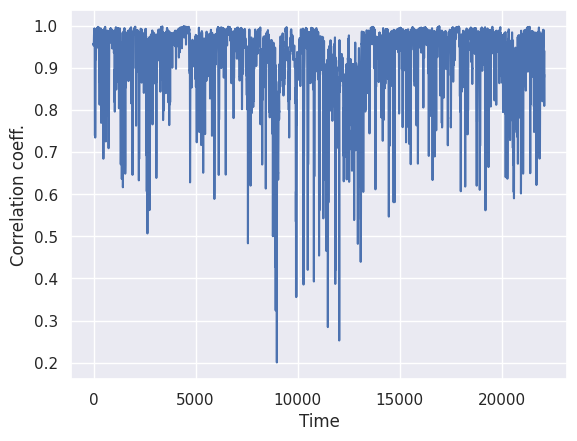

In [45]:
import seaborn as sns
sns.set()
plt.plot(r)
plt.xlabel("Time")
plt.ylabel("Correlation coeff.")

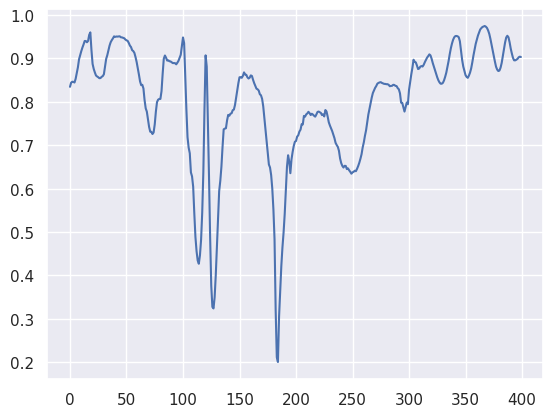

In [61]:
plt.plot(r[8800:9200])

In [62]:
r[0]

0.9579298022710703

In [93]:
images = np.concatenate((left_images_pims, left_images_pyav), axis=2)

images = np.expand_dims(images, axis=3)

n_frames = images.shape[0]
from moviepy.editor import ImageSequenceClip
f = [np.tile(images[x, :, :, :], (1, 1, 3)) for x in range(n_frames)]
vid = ImageSequenceClip(f, fps=200)
vid.write_videofile("/cluster/users/tom/pims_video.mp4")


Moviepy - Building video /cluster/users/tom/pims_video.mp4.
Moviepy - Writing video /cluster/users/tom/pims_video.mp4



Moviepy - Done !
Moviepy - video ready /cluster/users/tom/pims_video.mp4


In [84]:


# concatenate two images such that they form one big image with width 384
images = np.concatenate((images, images_pyav), axis=3)

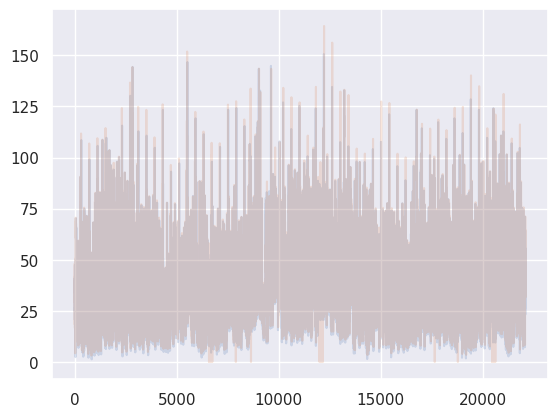

In [104]:
plt.plot(np.diff(left_images_pyav, axis=0).mean(axis=-1).mean(axis=-1), alpha=.2)
plt.plot(np.diff(left_images_pims, axis=0).mean(axis=-1).mean(axis=-1), alpha=.2)

In [88]:
images.shape

(22102, 192, 192, 2)